In [85]:
import pandas as pd
import sklearn 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn import feature_selection
import seaborn as sns
import scipy.stats
from matplotlib import pyplot as plt
import math
import openpyxl
from  matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import xlsxwriter
from sklearn import feature_selection


In [86]:
#Fundo a ser analisado
nome_da_base = 'book_pagaya_riverview'
col_fundos_input = ['Pagaya Opportunity Fund','Riverview ALF']
nome_benchmark = "IBOXHY Index"

tempo = 12 #252
const = 0.03
df=pd.read_csv('P:\\ciencia_de_dados\\Correlacao_de_fundos\\Desenvolvimento\\1DataPrep\\base_'+ nome_da_base + '.csv',sep =';',index_col=0,decimal=',')

df_mensal = pd.read_csv('P:\\ciencia_de_dados\\Correlacao_de_fundos\\Desenvolvimento\\1DataPrep\\base_'+ nome_benchmark + '.csv',sep =';',index_col=0,decimal=',')

df = pd.concat([df_mensal, df])

In [87]:
df['Retorno_Positivo'] = np.where(df.Retorno>=0, 1, 0)
df['Retorno_Negativo'] = np.where(df.Retorno<0, 1, 0)


In [88]:
df_sub = df.pivot(index=["data","Ano","Mes"], columns="Product", values="Retorno_1")
df_sub = df_sub.reset_index()
df_sub = df_sub.dropna()
#df_sub = df_sub.set_index("Ano")

In [89]:
df_sub.head()

Product,data,Ano,Mes,IBOXHY Index,Pagaya Opportunity Fund,Riverview ALF
0,2018-09-28,2018,9,1.003239,1.0066,1.001200
1,2018-10-31,2018,10,0.988760,1.0078,1.006093
2,2018-11-30,2018,11,0.991570,1.0062,1.005559
3,2018-12-31,2018,12,1.020459,1.0071,1.005331
4,2019-01-31,2019,1,1.016204,1.0061,1.005008


In [90]:
#Cria a df_sub1 para calculo do tracking error 
def f(x):
    print(x.name)
    return (x.div(df_sub[nome_benchmark]))#divisao entre o o retorno do fundo com o do benchmark

df_sub1 = df_sub.apply(lambda x: f(x) if x.name in col_fundos_input else x)

Pagaya Opportunity Fund
Riverview ALF


In [91]:
df_sub1

Product,data,Ano,Mes,IBOXHY Index,Pagaya Opportunity Fund,Riverview ALF
0,2018-09-28,2018,9,1.003239,1.003350,0.997968
1,2018-10-31,2018,10,0.988760,1.019257,1.017530
2,2018-11-30,2018,11,0.991570,1.014754,1.014108
3,2018-12-31,2018,12,1.020459,0.986909,0.985176
4,2019-01-31,2019,1,1.016204,0.990057,0.988983
5,2019-02-28,2019,2,1.009579,0.997049,0.996416
6,2019-03-29,2019,3,1.012878,0.993703,0.991985
7,2019-04-30,2019,4,1.000463,1.007234,1.018187
8,2019-05-31,2019,5,1.012451,0.993036,0.995014
9,2019-06-28,2019,6,1.004087,1.002204,1.012630


In [92]:
df_concat = pd.concat([df_sub, df_sub1[col_fundos_input].add_suffix('_spread')], axis=1, join="inner")
col_fundos = df_concat.columns[3:]
df_concat.head()

Product,data,Ano,Mes,IBOXHY Index,Pagaya Opportunity Fund,Riverview ALF,Pagaya Opportunity Fund_spread,Riverview ALF_spread
0,2018-09-28,2018,9,1.003239,1.0066,1.001200,1.003350,0.997968
1,2018-10-31,2018,10,0.988760,1.0078,1.006093,1.019257,1.017530
2,2018-11-30,2018,11,0.991570,1.0062,1.005559,1.014754,1.014108
3,2018-12-31,2018,12,1.020459,1.0071,1.005331,0.986909,0.985176
4,2019-01-31,2019,1,1.016204,1.0061,1.005008,0.990057,0.988983


In [93]:
#Retorno Mensal
def function_retorno(df,i,const,col_fundos):

    pivot_table = pd.pivot_table(df,index=['Ano'],values=[col_fundos[i]],fill_value=1,aggfunc='prod',columns=['Mes'])#,margins=True,margins_name="Year")
    pivot_table=pivot_table.rename(columns={1: 'Jan', 2:"Feb",3:"Mar", 4:"Apr", 5:"May", 6:"Jun",7:"Jul", 8:"Aug", 9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"})
    
    ITD_Matrix = [df[df.Ano <= i_ano][col_fundos[i]].prod() for i_ano in df.Ano.unique()]
    YTD_Matrix = [df[df.Ano == i_ano][col_fundos[i]].prod() for i_ano in df.Ano.unique()]
    
    IDT_df=pd.DataFrame(ITD_Matrix, columns = [col_fundos[i]] ,index=df_concat.Ano.unique())
    YTD_df=pd.DataFrame(YTD_Matrix, columns = [col_fundos[i]] ,index=df_concat.Ano.unique())
    
    IDT_df.columns = pd.MultiIndex.from_product([IDT_df.columns, ['Retorno IDT']])
    YTD_df.columns = pd.MultiIndex.from_product([YTD_df.columns, ['Retorno YDT']])
    
    pivot_table = pd.concat([pivot_table,YTD_df,IDT_df],axis=1)
    pivot_table = pivot_table-1
    
    # backgroung color mapping
    my_cmap=LinearSegmentedColormap.from_list('rg',["r", "w", "g"], N=256)
    pivot_table.index.name="Sob Retorno"
    return pivot_table.style.background_gradient(cmap=my_cmap,vmin = -const,vmax = const)


In [94]:
function_retorno(df_concat,0,const,col_fundos)

In [95]:
def vol_anualizada(x):
    return x.std() * (tempo**(1/2))

def retorno_anualizado(x,tempo):
    return (x.product()**(tempo/float(x.count())) - 1) * 100

def MDD(x):
    return min(((x/x.cummax()) - 1) * 100)

def retorno_total(x):
    return (x.prod() - 1) * 100

def Pontos_Positivos(x): #Gambiarra para nomear count
    return x.sum()

def Pontos_Negativos(x):
    return x.sum()


df.sort_values(by=["Product",'data'],ascending=False,inplace=True)

df['Retorno'] = df['Retorno'] *100

table = df.groupby('Product').agg({"Retorno": ['count','max','min','mean',vol_anualizada] ,"Retorno_Negativo":Pontos_Negativos,"Retorno_Positivo": Pontos_Positivos,"Retorno_1" : [retorno_total, lambda x: retorno_anualizado(x,tempo)]}).rename(columns={'vol_anualizada':'Volatilidade Anualizada','<lambda_0>' :'Retorno Anualizado','retorno_total':'Retorno Total'})
table.columns = table.columns.droplevel(0)
table["Sharpe"] = (table["Retorno Anualizado"] / table["Volatilidade Anualizada"])



df.sort_values(by=["Product",'data'],ascending=True,inplace=True)
table2 = df.groupby('Product').agg({"FinancialPrice":MDD}).rename(columns={"FinancialPrice":"Maximo Drawdown"})

df_univar = pd.concat([table,table2],axis=1).T
df_univar.rename(index = {'Retorno Total':"Retorno Acumulado ITD", "count":"Pontos","Pontos_Positivos": "Pontos Positivos", "Pontos_Negativos":"Pontos Negativos","max":"Retorno Mensal Máximo","min" : "Retorno Mensal Minimo", "mean": "Média dos Retornos Mensais"}, inplace=True)
df_univar.index.name='Sob Retorno (%)'
df_univar

Product,IBOXHY Index,Pagaya Opportunity Fund,Riverview ALF
Sob Retorno (%),,,
Pontos,33.000000,33.000000,33.000000
Retorno Mensal Máximo,3.108096,2.699995,8.754587
Retorno Mensal Minimo,-6.992590,0.539994,-5.393755
Média dos Retornos Mensais,0.528212,0.813031,1.284040
Volatilidade Anualizada,5.786705,1.579075,7.055576
Pontos Negativos,5.000000,0.000000,1.000000
Pontos Positivos,28.000000,33.000000,32.000000
Retorno Acumulado ITD,18.446872,30.589867,51.377453
Retorno Anualizado,6.349598,10.191705,16.272443


In [96]:
df

,MesAno,data,Product,FinancialPrice,Mes_nomial,Mes,Ano,Retorno_1,Retorno,Retorno_Positivo,Retorno_Negativo
22,09-2018,2018-09-28,IBOXHY Index,276.78410,Sep,9,2018,1.003239,0.323904,1,0
25,10-2018,2018-10-31,IBOXHY Index,277.68060,Oct,10,2018,0.988760,-1.124030,0,1
28,11-2018,2018-11-30,IBOXHY Index,274.55940,Nov,11,2018,0.991570,-0.843012,0,1
31,12-2018,2018-12-31,IBOXHY Index,272.24480,Dec,12,2018,1.020459,2.045906,1,0
0,01-2019,2019-01-31,IBOXHY Index,277.81470,Jan,1,2019,1.016204,1.620364,1,0
...,...,...,...,...,...,...,...,...,...,...,...
63,02-2021,2021-02-26,Riverview ALF,133.53000,Feb,2,2021,1.087546,8.754587,1,0
64,03-2021,2021-03-31,Riverview ALF,145.22000,Mar,3,2021,1.000689,0.068867,1,0
65,04-2021,2021-04-30,Riverview ALF,145.32000,Apr,4,2021,1.020629,2.062893,1,0
66,05-2021,2021-05-31,Riverview ALF,148.31781,May,5,2021,1.020629,2.062905,1,0


In [97]:
def regressao_linear(df,nome_do_fundo,nome_benchmark):   
    df_fundo = df.loc[df.Product == nome_do_fundo,['data','Retorno']]
    df_bench = df.loc[df.Product == nome_benchmark,['data','Retorno']]

    df_fundo.index = df_fundo['data']
    df_bench.index = df_bench['data']
    df_join =pd.merge(df_bench, df_fundo,how='inner',left_index=True, right_index=True).dropna()[['Retorno_x','Retorno_y']]

    #Regressao Linear total
    x = (df_join['Retorno_x']).values.reshape((-1, 1))
    y= (df_join['Retorno_y']).values.reshape((-1, 1))
    
    regr = sklearn.linear_model.LinearRegression()
    regr.fit(x, y)
    return regr.coef_[0][0],regr.intercept_[0]

k=0
v = []
for i in col_fundos_input:
    v.append(regressao_linear(df,i,nome_benchmark))
    
df_bivar = pd.DataFrame(v,index=col_fundos_input).rename(columns = {0:'Beta',1:'Alpha'}).T
df_bivar

#Tracking Error
v=[]
for i in col_fundos_input:
    v.append(np.std(df_sub1[i])*100)


df_bivar.loc['Tracking Error'] = v
df_bivar.index.name = 'Sob Retorno (%)'
df_bivar

,Pagaya Opportunity Fund,Riverview ALF
Sob Retorno (%),,
Beta,-0.111548,0.208695
Alpha,0.871952,1.173805
Tracking Error,1.982167,2.413342


In [98]:
df_sub.head()

Product,data,Ano,Mes,IBOXHY Index,Pagaya Opportunity Fund,Riverview ALF
0,2018-09-28,2018,9,1.003239,1.0066,1.001200
1,2018-10-31,2018,10,0.988760,1.0078,1.006093
2,2018-11-30,2018,11,0.991570,1.0062,1.005559
3,2018-12-31,2018,12,1.020459,1.0071,1.005331
4,2019-01-31,2019,1,1.016204,1.0061,1.005008


C:\Users\ana.carolina\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

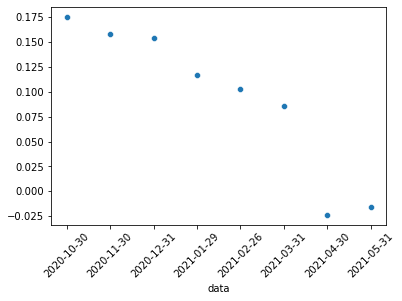

In [99]:
#Tem q shiftar as linhas
v = [scipy.stats.pearsonr(df_sub['Riverview ALF'][i:i+24], df_sub['Pagaya Opportunity Fund'][i:i+24])[0] for i in range(0,len(df_sub.Ano)-25)]

a_plot =sns.scatterplot(df_sub.data[df_sub.index>=25],v)
plt.xticks(rotation=45)
#a_plot.set(ylim=(-1, 1))

C:\Users\ana.carolina\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

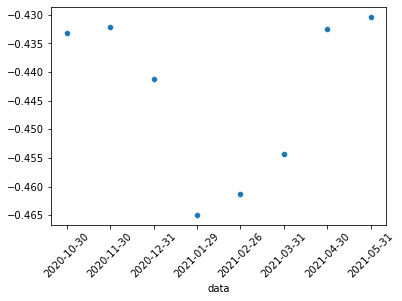

In [100]:
#Tem q shiftar as linhas
v1 = [scipy.stats.pearsonr(df_sub['IBOXHY Index'][i:i+24], df_sub['Pagaya Opportunity Fund'][i:i+24])[0] for i in range(0,len(df_sub.Ano)-25)]

v1
a_plot = sns.scatterplot(df_sub.data[df_sub.index>=25],v1)
plt.xticks(rotation=45)
#a_plot.set(ylim=(-1, 1))

C:\Users\ana.carolina\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


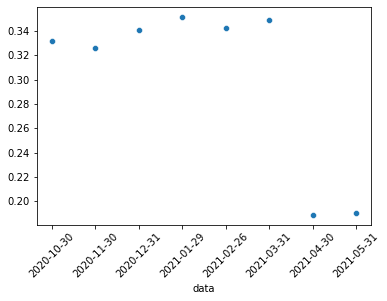

In [113]:
v2 = [scipy.stats.pearsonr(df_sub['IBOXHY Index'][i:i+24], df_sub['Riverview ALF'][i:i+24])[0] for i in range(0,len(df_sub.Ano)-25)]

a_plot = sns.scatterplot(df_sub.data[df_sub.index>=25],v2)
plt.xticks(rotation=45)
#a_plot.set(ylim=(-1, 1))
plt.savefig('correlacao_iboxhy_riverviewT2Y.png')

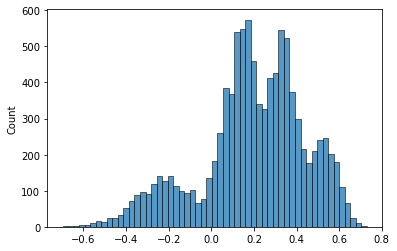

In [114]:
def func(df):
    df_rand = df.sample(n = 15)
    return scipy.stats.pearsonr(df_rand['IBOXHY Index'], df_rand['Riverview ALF'])[0]

v2 = [func(df_sub) for i in range(10000)]

sns.histplot(v2)
v2
np.mean(v2)
plt.savefig('distribuicao.png')

In [103]:
sklearn.feature_selection.mutual_info_regression(df_sub[col_fundos_input],df_sub[nome_benchmark])

array([0, 0])

In [104]:
df_sub.iloc[:,3:] = (df_sub.iloc[:,3:] *100)-100

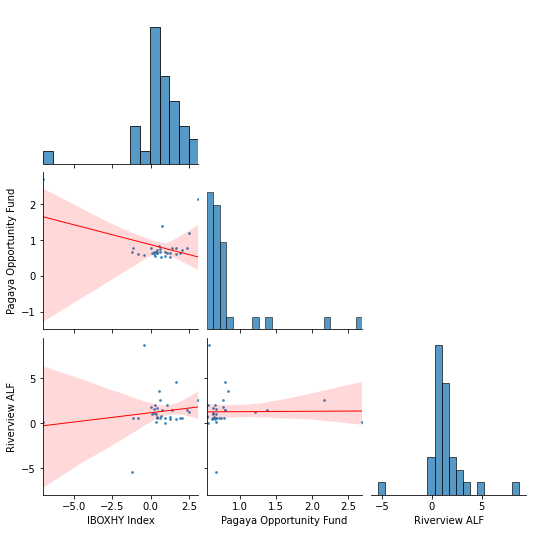

In [105]:
sns.pairplot(data=df_sub.iloc[:,3:],kind="reg",plot_kws={'line_kws':{'color':'red','lw':1},'scatter_kws': {'s': 3}},corner= True)
plt.savefig('fig_pairplot.png')


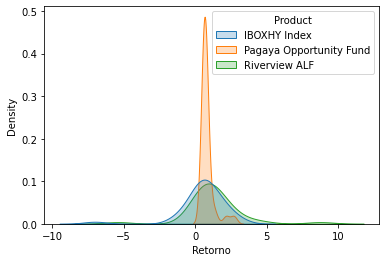

In [116]:
sns.kdeplot(data=df.reset_index(),x = 'Retorno',hue = 'Product',fill=True)
plt.savefig('retorno_density_distribution.png')

In [107]:
df

,MesAno,data,Product,FinancialPrice,Mes_nomial,Mes,Ano,Retorno_1,Retorno,Retorno_Positivo,Retorno_Negativo
22,09-2018,2018-09-28,IBOXHY Index,276.78410,Sep,9,2018,1.003239,0.323904,1,0
25,10-2018,2018-10-31,IBOXHY Index,277.68060,Oct,10,2018,0.988760,-1.124030,0,1
28,11-2018,2018-11-30,IBOXHY Index,274.55940,Nov,11,2018,0.991570,-0.843012,0,1
31,12-2018,2018-12-31,IBOXHY Index,272.24480,Dec,12,2018,1.020459,2.045906,1,0
0,01-2019,2019-01-31,IBOXHY Index,277.81470,Jan,1,2019,1.016204,1.620364,1,0
...,...,...,...,...,...,...,...,...,...,...,...
63,02-2021,2021-02-26,Riverview ALF,133.53000,Feb,2,2021,1.087546,8.754587,1,0
64,03-2021,2021-03-31,Riverview ALF,145.22000,Mar,3,2021,1.000689,0.068867,1,0
65,04-2021,2021-04-30,Riverview ALF,145.32000,Apr,4,2021,1.020629,2.062893,1,0
66,05-2021,2021-05-31,Riverview ALF,148.31781,May,5,2021,1.020629,2.062905,1,0


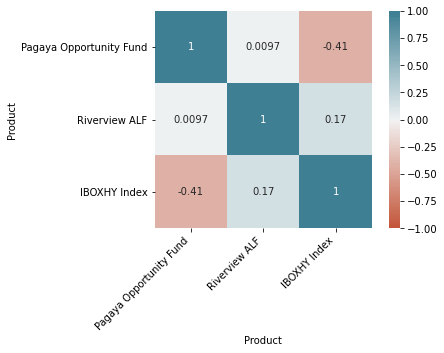

In [108]:
col_fundos1 =col_fundos_input
col_fundos1.append(nome_benchmark)

corr = df_sub[col_fundos_input].corr()

col_fundos1 =col_fundos_input
ax = sns.heatmap(
    corr,
    annot=True, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.savefig('CorrelationMatrix.png',dpi=200)

In [109]:
#Descritivas anuais
df_anuais = df.groupby(['Ano','Product']).agg({"Retorno": ['count','max','min','mean',vol_anualizada] ,"Retorno_1" : ['prod',lambda x: retorno_anualizado(x,tempo)]}).unstack().T.reset_index().iloc[: , 1:]
df_anuais

Ano,level_1,Product,2018,2019,2020,2021
0,count,IBOXHY Index,4.000000,12.000000,12.000000,5.000000
1,count,Pagaya Opportunity Fund,4.000000,12.000000,12.000000,5.000000
2,count,Riverview ALF,4.000000,12.000000,12.000000,5.000000
3,max,IBOXHY Index,2.045906,1.916885,3.108096,1.074302
4,max,Pagaya Opportunity Fund,0.779998,0.770009,2.699995,0.760007
5,max,Riverview ALF,0.609267,1.865816,4.615903,8.754587
6,min,IBOXHY Index,-1.124030,0.046313,-6.992590,-0.460446
7,min,Pagaya Opportunity Fund,0.619996,0.539994,0.620008,0.559998
8,min,Riverview ALF,0.120008,0.475967,-5.393755,0.068867
9,mean,IBOXHY Index,0.100692,0.805193,0.409526,0.490322


In [110]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('book.xlsx', engine='xlsxwriter')
workbook = writer.book
worksheet = workbook.add_worksheet('Relatorio')
df_sub.to_excel(writer,sheet_name = 'UnstackRetornosPercentuais')
df.to_excel(writer, sheet_name='StackRetornos1')

options = {
    'width': 256,
    'height': 100,
    'x_offset': 10,
    'y_offset': 10,

    'font': {'color': 'white',
             'size': 20},
    'align': {'vertical': 'middle',
              'horizontal': 'center'
              },
    'gradient': {'colors': ['#3E9EBC',
                            '#2F778D',
                            ]},
}

options2 = {
    'width': 200,
    'height': 20,
    'x_offset': 10,
    'y_offset': 10,

    'font': {'color': 'white',
             'size': 10},
    'align': {'vertical': 'middle',
              'horizontal': 'center'
              },
    'gradient': {'colors': ['#800000',
                            '#800000',
                            ]},
}
options3 = {
    'width': 200,
    'height': 20,
    'x_offset': 10,
    'y_offset': 10,

    'font': {'color': 'white',
             'size': 10},
    'align': {'vertical': 'middle',
              'horizontal': 'center'
              },
    'gradient': {'colors': ['#3E9EBC',
                            '#2F778D',
                            ]},
}
worksheet.insert_textbox('B2', 'Relatório Estatístico',options)


writer.sheets['Relatorio'] = worksheet
spread_names = [s for s in df_concat.columns[3:] if 'spread' in s]

#Tabela de retornos coloridos
worksheet.insert_textbox('B8', 'Retorno do fundo - Retorno do benchmarck',options2)
table_size = len(df.Ano.unique()) + 4

for i in range(len(col_fundos)):
    function_retorno(df_concat,i,const,col_fundos).to_excel(writer,sheet_name = 'Relatorio',float_format="%.4f",startrow=(8 + table_size*i), startcol=0,index_label='Retorno')
    if col_fundos[i] in spread_names:
        worksheet.insert_textbox('B'+ str((8 + table_size*i)), 'Spread do Retorno',options2)
    else:    
        worksheet.insert_textbox('B'+ str((8 + table_size*i)), 'Retorno',options3)
    
#Graficos
i = 2*table_size+table_size*i
worksheet.insert_image('A'+ str(i),'fig_pairplot.png')
worksheet.insert_image('O'+ str(i),'retorno_density_distribution.png')
worksheet.insert_image('O'+ str(i+20) ,'CorrelationMatrix.png')#,{'x_scale': 2, 'y_scale': 2})    

#Tabelas com os resultados
df_univar.to_excel(writer, sheet_name='Relatorio',float_format="%.2f",startrow=8,startcol = 17)
df_bivar.to_excel(writer, sheet_name='Relatorio',float_format="%.2f",startcol=17,startrow = (8+ len(df_univar)+2))
df_anuais.to_excel(writer, sheet_name='Anuais',float_format="%.2f")  

#Formata tamanho da coluna
writer.sheets['Relatorio'].set_column(17, 20, 25)
writer.sheets['Relatorio'].set_column(0, 0, 15)
writer.sheets['Relatorio'].set_column(13, 14, 15)

writer.save()

In [111]:
#Descritivas mensais

#df[['Retorno','MesAno','Product']].groupby(['MesAno','Product']).describe().unstack()


In [112]:
#Calculo dos retornos mensais no diario
mensal = df[['Product','MesAno','Retorno_1']].groupby(['MesAno','Product']).agg(['prod']).unstack()#, 'min', 'max','std','count'

mensal.columns = mensal.columns.droplevel(0).droplevel(0)
mensal  = mensal.reset_index()
mensal[['ibov','paiva']] = mensal[['ibov','paiva']]*100 -100
mensal

KeyError: "None of [Index(['ibov', 'paiva'], dtype='object', name='Product')] are in the [columns]"

In [ ]:
df

In [ ]:
#Media Simples
{'paiva': mensal.paiva.mean(),'ibov': mensal.ibov.mean()}

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
mensal.select_dtypes(include=numerics).columns
for i in mensal.select_dtypes(include=numerics).columns:
    sns.kdeplot(mensal[i], label=i, shade=True)

plt.title('')
plt.xlabel('')
plt.legend()
plt.show()

In [ ]:
anual = df.groupby(['Product','Ano'])[['Product','Ano','Retorno']].agg(['mean', 'count', 'std']).Retorno

ci95_hi = []
ci95_lo = []

for i in anual.index:
    m, c, s = anual.loc[i]
    ci95_hi.append(m + 1.95*s/math.sqrt(c))
    ci95_lo.append(m - 1.95*s/math.sqrt(c))

anual['ci95_hi'] = ci95_hi
anual['ci95_lo'] = ci95_lo
print(anual)

In [ ]:

#some example data
x= np.linspace(0.1, 9.9, 20)
y = 3.0 * x
#some confidence interval
ci = 1.96 * np.std(y)/np.mean(y)

fig, ax = plt.subplots()
ax.plot(x,y)
ax.fill_between(x, (y-ci), (y+ci), color='b', alpha=.1)

In [ ]:
#some confidence interval
x=1
z=mean_confidence_interval(mensal.ibov,confidence=0.95)

fig, ax = plt.subplots()
ax.plot(x,z[0])
ax.fill_between(z[0], z[1], z[2], color='b', alpha=.1)

In [ ]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, (m-h), (m+h)

mean_confidence_interval(mensal.ibov,confidence=0.95)

In [ ]:
mean_confidence_interval(mensal.paiva,confidence=0.95)


In [ ]:
df.Product.unique()

In [ ]:
df[['Retorno','Product']]

In [ ]:
df[(df.Product == 'IHFAIHFA Index') | (df.Product == 'IBX Index') ]

In [ ]:
sns.kdeplot(data=df[(df.Product == 'IFMMIFMM Index') | (df.Product == 'NORONHM BZ Equity')],x = 'Retorno',hue = 'Product',fill=True)

In [ ]:
sns.kdeplot(data=df[(df.Product == 'IHFAIHFA Index') | (df.Product == 'NORONHM BZ Equity')],x = 'Retorno',hue = 'Product',fill=True)